In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

le = LabelEncoder()

In [9]:
df = pd.read_csv('insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# One hot encoding on sex and region coulmns

In [14]:

df = pd.read_csv('insurance.csv')

df_onehot_sex = pd.get_dummies(df, columns=['sex'], drop_first=True)

df_onehot_region = pd.get_dummies(df, columns=['region'])
df_onehot_sex.head()



   age     sex     bmi  children smoker      charges  region_northeast  \
0   19  female  27.900         0    yes  16884.92400             False   
1   18    male  33.770         1     no   1725.55230             False   
2   28    male  33.000         3     no   4449.46200             False   
3   33    male  22.705         0     no  21984.47061             False   
4   32    male  28.880         0     no   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [ ]:
df_onehot_region.head()


# Label encoding on smoker and region column

In [17]:


df['smoker_encoded'] = le.fit_transform(df['smoker'])

df['region_encoded'] = le.fit_transform(df['region'])
df[['smoker', 'smoker_encoded']].head()



,smoker,smoker_encoded
0,yes,1
1,no,0
2,no,0
3,no,0
4,no,0


In [18]:
df[['region', 'region_encoded']].head()

,region,region_encoded
0,southwest,3
1,southeast,2
2,southeast,2
3,northwest,1
4,northwest,1


# caping BMI column from 5 - 95 percentiles

In [23]:
bmi_15 = df['bmi'].quantile(0.15)
bmi_85 = df['bmi'].quantile(0.85)

df['bmi_capped'] = df['bmi'].apply(lambda x: bmi_15 if x < bmi_15 else (bmi_85 if x > bmi_85 else x))

df[['bmi', 'bmi_capped']].head(10)

,bmi,bmi_capped
0,27.900,27.90000
1,33.770,33.77000
2,33.000,33.00000
3,22.705,24.26625
4,28.880,28.88000
5,25.740,25.74000
6,33.440,33.44000
7,27.740,27.74000
8,29.830,29.83000
9,25.840,25.84000


# making the 95th percentile top

In [20]:
charges_95 = df['charges'].quantile(0.95)

df['charges_topcod'] = df['charges'].apply(lambda x: charges_95 if x > charges_95 else x)

df[['charges', 'charges_topcod']].head(10)

       charges  charges_topcod
0  16884.92400     16884.92400
1   1725.55230      1725.55230
2   4449.46200      4449.46200
3  21984.47061     21984.47061
4   3866.85520      3866.85520
5   3756.62160      3756.62160
6   8240.58960      8240.58960
7   7281.50560      7281.50560
8   6406.41070      6406.41070
9  28923.13692     28923.13692


# windorizing the charges column at the 5 and 95 percentiles.



In [24]:

df['charges_win'] = winsorize(df['charges'], limits=[0.05, 0.80])

df[['charges', 'charges_win']].head(10)


,charges,charges_win
0,16884.92400,3989.8410
1,1725.55230,1748.7740
2,4449.46200,3989.8410
3,21984.47061,3989.8410
4,3866.85520,3866.8552
5,3756.62160,3756.6216
6,8240.58960,3989.8410
7,7281.50560,3989.8410
8,6406.41070,3989.8410
9,28923.13692,3989.8410


Skewness of symmetric data: 0.02177237020246131
Skewness of right-skewed data: 2.017074126509346
Skewness of left-skewed data: -1.8145007664522037


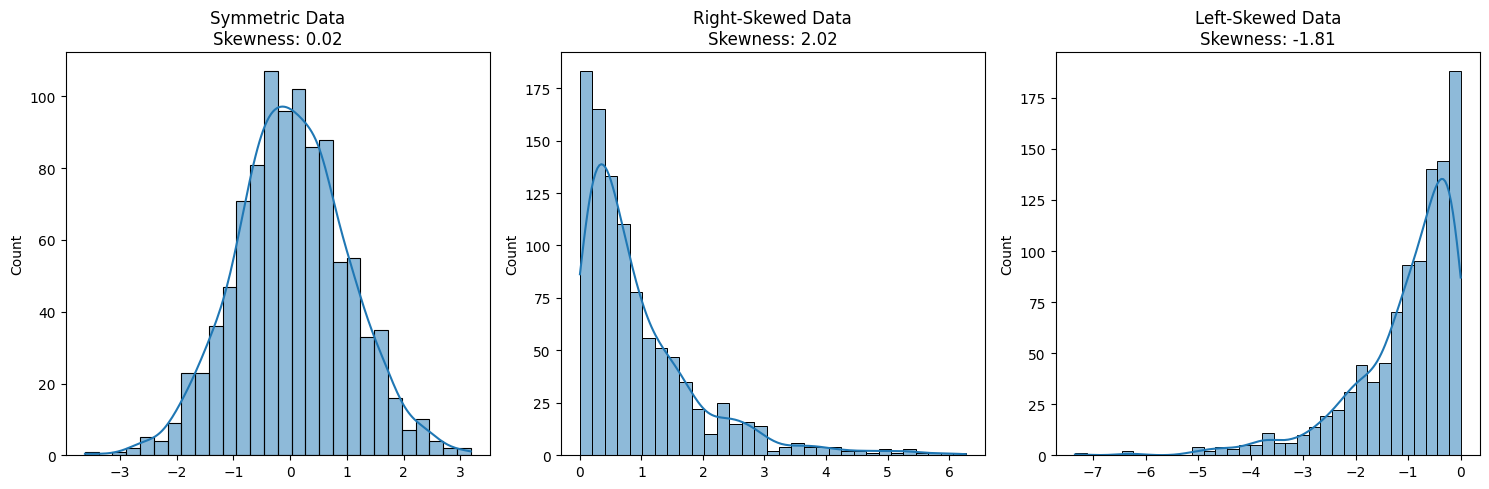

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Generate sample data
data_symmetric = np.random.normal(0, 1, 1000)
data_right_skewed = np.random.exponential(1, 1000)
data_left_skewed = -np.random.exponential(1, 1000)

# Calculate skewness
skew_symmetric = skew(data_symmetric)
skew_right = skew(data_right_skewed)
skew_left = skew(data_left_skewed)

print(f'Skewness of symmetric data: {skew_symmetric}')
print(f'Skewness of right-skewed data: {skew_right}')
print(f'Skewness of left-skewed data: {skew_left}')

# Plot the distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_symmetric, kde=True)
plt.title(f'Symmetric Data\nSkewness: {skew_symmetric:.2f}')

plt.subplot(1, 3, 2)
sns.histplot(data_right_skewed, kde=True)
plt.title(f'Right-Skewed Data\nSkewness: {skew_right:.2f}')

plt.subplot(1, 3, 3)
sns.histplot(data_left_skewed, kde=True)
plt.title(f'Left-Skewed Data\nSkewness: {skew_left:.2f}')

plt.tight_layout()
plt.show()
